In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

import json 
import requests
from pprint import pprint 

In [2]:
file=pd.read_csv("Resources/USvideos.csv")
canada=pd.read_csv("Resources/CAvideos.csv")


In [3]:
file.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [23]:
with open('Resources/US_category_id.json') as file:
    data = json.load(file)
pprint(data)

{'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
            'id': '1',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Film & Animation'}},
           {'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
            'id': '2',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Autos & Vehicles'}},
           {'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
            'id': '10',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Music'}},
 

In [24]:
id_to_category = {}

for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']
        
id_to_category

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [10]:
groupby_category=file.groupby("category_id")
category=groupby_category.sum()
category

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,,,,,,,
1,7284156721,165997476,6075148,17887060,28.0,14.0,13.0
2,520690717,4245656,243010,784447,5.0,10.0,0.0
10,40132892190,1416838584,51179008,125296396,9.0,24.0,0.0
15,764651989,19370702,527379,2660705,4.0,0.0,0.0
17,4404456673,98621211,5133551,11192155,28.0,17.0,2.0
19,343557084,4836246,340427,911511,0.0,0.0,0.0
20,2141218625,69038284,9184466,14740713,8.0,0.0,0.0
22,4917191726,186615999,10187901,24778032,66.0,37.0,0.0
23,5117426208,216346746,7230391,22545582,2.0,0.0,0.0


In [11]:
#category.set_index([list(id_to_category.values()), 'category'])
category_list=list(id_to_category.values())

In [12]:
category_add_column=pd.DataFrame({'category':category_list})
category_add_column
category['category']=category_add_column['category']
category

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category
category_id,,,,,,,,
1,7284156721,165997476,6075148,17887060,28.0,14.0,13.0,Autos & Vehicles
2,520690717,4245656,243010,784447,5.0,10.0,0.0,Music
10,40132892190,1416838584,51179008,125296396,9.0,24.0,0.0,Comedy
15,764651989,19370702,527379,2660705,4.0,0.0,0.0,Science & Technology
17,4404456673,98621211,5133551,11192155,28.0,17.0,2.0,Movies
19,343557084,4836246,340427,911511,0.0,0.0,0.0,Action/Adventure
20,2141218625,69038284,9184466,14740713,8.0,0.0,0.0,Classics
22,4917191726,186615999,10187901,24778032,66.0,37.0,0.0,Documentary
23,5117426208,216346746,7230391,22545582,2.0,0.0,0.0,Drama


In [13]:
index = category.index

In [15]:
canada.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [16]:
with open('Resources/CA_category_id.json') as file:
    data = json.load(file)
pprint(data)

{'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
            'id': '1',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Film & Animation'}},
           {'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
            'id': '2',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Autos & Vehicles'}},
           {'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
            'id': '10',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Music'}},
 

In [19]:
id_to_category = {}

for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']
        
id_to_category

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [90]:
canada_groupby_category = canada.groupby("category_id")
canada_category = canada_groupby_category.mean()
canada_category

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,,,,,,,
1,1.426729e+06,37767.962621,1510.319903,4896.394660,0.007282,0.006311,0.005340
2,5.667594e+05,13405.422096,560.271955,2878.719547,0.005666,0.000000,0.002833
10,3.532525e+06,151285.856339,5922.859823,14053.940499,0.005360,0.003216,0.000268
15,6.384612e+05,23931.533875,501.363144,4941.837398,0.000000,0.000000,0.000000
17,1.075584e+06,21330.972013,1179.177969,2748.956584,0.005023,0.003588,0.000359
19,3.667014e+05,9568.658163,331.278061,1556.002551,0.007653,0.000000,0.000000
20,9.237592e+05,38487.017857,1820.596726,7191.136161,0.002232,0.000744,0.000000
22,7.864136e+05,25673.219001,2309.572716,4097.003898,0.014129,0.006090,0.000487
23,9.828886e+05,51960.422475,1423.937185,5205.082428,0.002385,0.000000,0.000530


In [91]:
category_list=list(id_to_category.values())

In [92]:
canada_category_add_column=pd.DataFrame({'category':category_list})
canada_category['category']=canada_category_add_column['category']
canada_category.fillna('N/A')
canada_category

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category
category_id,,,,,,,,
1,1.426729e+06,37767.962621,1510.319903,4896.394660,0.007282,0.006311,0.005340,Autos & Vehicles
2,5.667594e+05,13405.422096,560.271955,2878.719547,0.005666,0.000000,0.002833,Music
10,3.532525e+06,151285.856339,5922.859823,14053.940499,0.005360,0.003216,0.000268,Comedy
15,6.384612e+05,23931.533875,501.363144,4941.837398,0.000000,0.000000,0.000000,Science & Technology
17,1.075584e+06,21330.972013,1179.177969,2748.956584,0.005023,0.003588,0.000359,Movies
19,3.667014e+05,9568.658163,331.278061,1556.002551,0.007653,0.000000,0.000000,Action/Adventure
20,9.237592e+05,38487.017857,1820.596726,7191.136161,0.002232,0.000744,0.000000,Classics
22,7.864136e+05,25673.219001,2309.572716,4097.003898,0.014129,0.006090,0.000487,Documentary
23,9.828886e+05,51960.422475,1423.937185,5205.082428,0.002385,0.000000,0.000530,Drama


In [95]:
canada_category.drop(canada_category.tail(1).index,inplace=True)
canada_category

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category
category_id,,,,,,,,
1,1.426729e+06,37767.962621,1510.319903,4896.394660,0.007282,0.006311,0.005340,Autos & Vehicles
2,5.667594e+05,13405.422096,560.271955,2878.719547,0.005666,0.000000,0.002833,Music
10,3.532525e+06,151285.856339,5922.859823,14053.940499,0.005360,0.003216,0.000268,Comedy
15,6.384612e+05,23931.533875,501.363144,4941.837398,0.000000,0.000000,0.000000,Science & Technology
17,1.075584e+06,21330.972013,1179.177969,2748.956584,0.005023,0.003588,0.000359,Movies
19,3.667014e+05,9568.658163,331.278061,1556.002551,0.007653,0.000000,0.000000,Action/Adventure
20,9.237592e+05,38487.017857,1820.596726,7191.136161,0.002232,0.000744,0.000000,Classics
22,7.864136e+05,25673.219001,2309.572716,4097.003898,0.014129,0.006090,0.000487,Documentary
23,9.828886e+05,51960.422475,1423.937185,5205.082428,0.002385,0.000000,0.000530,Drama


# Canada Data Overview

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

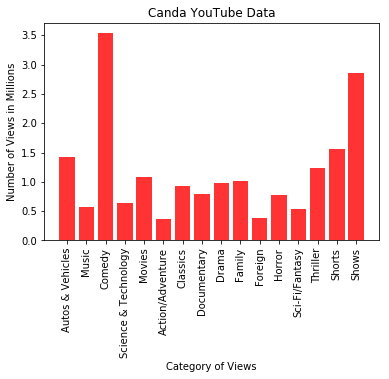

In [103]:
#x_axis[]
x_axis = canada_category['category']
y_axis = canada_category['views']

plt.title("Canda YouTube Data")
plt.xlabel("Category of Views")
plt.ylabel("Number of Views in Millions")

plt.bar(x_axis, y_axis/1000000, color='red', alpha = 0.8, align='center')
plt.xticks(rotation=90)


Text(0, 0.5, 'Number of Views')

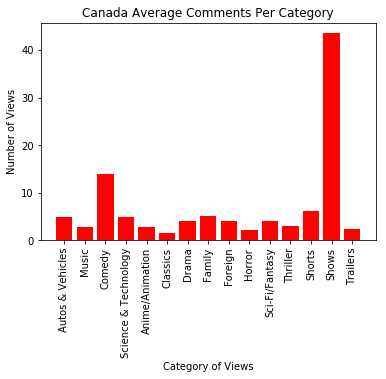

In [34]:
x_axis = canada_category['category']
y_axis = canada_category['comment_count']

plt.bar(x_axis, y_axis, color='r', align='center')
plt.xticks(rotation=90)
plt.title("Canada Average Comments Per Category")
plt.xlabel("Category of Views")
plt.ylabel("Number of Views")

Text(0, 0.5, 'Number of Likes')

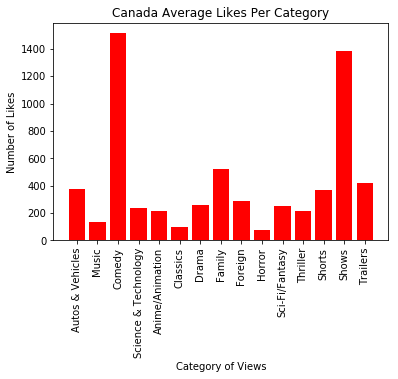

In [33]:
x_axis = canada_category['category']
y_axis = canada_category['likes']

plt.bar(x_axis, y_axis/100, color='r', align='center')
plt.xticks(rotation=90)
plt.title("Canada Average Likes Per Category")
plt.xlabel("Category of Views")
plt.ylabel("Number of Likes")

Text(0, 0.5, 'Number of Dislikes')

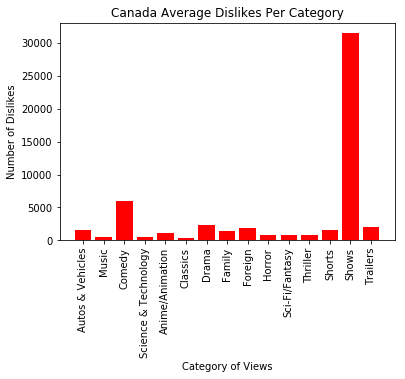

In [30]:
x_axis = canada_category['category']
y_axis = canada_category['dislikes']

plt.bar(x_axis, y_axis, color='r', align='center')
plt.xticks(rotation=90)
plt.title("Canada Average Dislikes Per Category")
plt.xlabel("Category of Views")
plt.ylabel("Number of Dislikes")


In [80]:
axis_dictionary = dict(zip(range(len(canada_category.category)),canada_category.category))
type(canada_category.category.)

pandas.core.series.Series

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

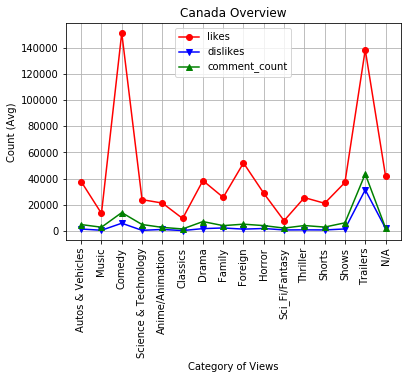

In [86]:
x_axis=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
Likes=plt.plot(x_axis,canada_category["likes"], marker="o", color="red")
Dislikes=plt.plot(x_axis, canada_category["dislikes"], marker="v", color="blue")
Comment=plt.plot(x_axis,canada_category["comment_count"], marker="^", color="green")

plt.xticks(x_axis,["Autos & Vehicles", "Music", "Comedy", "Science & Technology", "Anime/Animation", "Classics",
                  "Drama", "Family", "Foreign", "Horror", "Sci_Fi/Fantasy", "Thriller", "Shorts", "Shows", "Trailers", "N/A"])

plt.grid()
plt.title("Canada Overview")
plt.xlabel("Category of Views")
plt.ylabel("Count (Avg)")
plt.legend(loc="best")
plt.xticks(rotation=90)